## PROBLEMAS DE TRANSPORTE 

Definición: El problema de transporte es un problema clásico de programación lineal en el cual se debe minimizar el costo del abastecimiento a una serie de puntos de demanda a partir de un grupo de puntos de oferta, teniendo en cuenta los distintos precios de envío de cada punto de oferta a cada punto de demanda.

## planteamiento del problema 

La empresa BBC dedicada a la fabricación de cerveza artesanal dispone de dos sedes para satisfacer la demanda diaria de cerveza en cinco establecimientos de diferentes ciudades. Las sedes A y B pueden satisfacer 1000 y 4000 cervezas al día respectivamente. Las necesidades de los establecimientos 1 a 5 son 500, 900, 1800, 200 y 700 al día respectivamente.Teniendo en cuenta que el gerente financiero informó que el costo de transporte por caja de cada ruta se conforma de acuerdo a la siguiente tabla:

Populating the interactive namespace from numpy and matplotlib


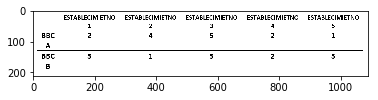

In [93]:
import skimage
import pulp as pulp

%pylab inline  
import skimage.io as skio

image = skio.imread('costo1.PNG')
plt.imshow(image)

## SOLUCIÓN

Para solucionar problemas de transporte se deben implementar las librerias PulP o Pyomo, su instalación se realiza por fuera por la consola (Una sola vez). Usaremos en este caso, el paquete de programación lineal PuLP,el cual, utiliza en gran medida la sintaxis de Python y viene empaquetado con el solucionador de fuente abierta y comerciales LP.

$ pip install pulp

Paso 1. El primer paso corresponde a la definición de las variables, regularmente se le denomina a las variables de manera algebraica Xi,j donde i simboliza a la fuente y j simboliza al destino. En este caso i define el conjunto {BBC A y BBC B}, y j define el conjunto {Bar1, Bar2, Bar3, Bar4 y Bar5}. 

In [74]:
# Creamos la variable prob que contiene los datos del problema
prob = pulp.LpProblem("Problema de distribución de cerveza", pulp.LpMinimize)


In [75]:
# Creamos lista de nodos de oferta
cervecerias = ["BBC A", "BBC B"]


Paso 2. El segundo paso corresponde a la formulación de las restricciones de oferta y demanda, cuya cantidad se encuentra determinada por el factor entre fuentes y destinos.

In [76]:
# Capacidad de oferta de cada cerveceria
oferta = {"BBC A": 1000,
          "BBC B": 4000}

# Creamos la lista de los bares o nodos de demanda
bares = ["Bar 1", "Bar 2", "Bar 3", "Bar 4", "Bar 5"]

In [77]:
# Capacidad de demanda de cada bar
demanda = {"Bar 1":500,
           "Bar 2":900,
           "Bar 3":1800,
           "Bar 4":200,
           "Bar 5":700,}

In [78]:
# Lista con los costos de transporte de cada nodo
costos = [   #Bares
         #1 2 3 4 5
         [2,4,5,2,1],#A   Cervecerías
         [3,1,3,2,3] #B
         ]

Paso 3. El tercer paso consiste en la creacion de un listado con las posibles rutas de transporte y otra con la cantidad enviada a cada destino. Por ultimo se agregan a la variable prob, la función objetivo, la máxima oferta de cada cerveceria y la mínima demanda de cada bar (datos requeridos por PuLP) 

In [83]:
# Convertimos los costos en un diccionario de PuLP
costos = pulp.makeDict([cervecerias, bares], costos,0)

In [84]:
# Creamos una lista que contiene todas las posibles rutas de tranporte.
rutas = [(c,b) for c in cervecerias for b in bares]

In [85]:
# creamos x que contendrá la candidad enviada en las rutas
x = pulp.LpVariable.dicts("ruta", (cervecerias, bares), 
                        lowBound = 0,
                        cat = pulp.LpInteger)


In [86]:

# Agregamos la función objetivo al problema
prob += sum([x[c][b]*costos[c][b] for (c,b) in rutas]), \
            "Suma_de_costos_de_transporte"

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pulp\pulp.py:1348: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [87]:
# Agregamos la restricción de máxima oferta de cada cervecería al problema.
for c in cervecerias:
    prob += sum([x[c][b] for b in bares]) <= oferta[c], \
            "Suma_de_Productos_que_salen_de_cervecerias_%s"%c

In [88]:
# Agregamos la restricción de demanda mínima de cada bar
for b in bares:
    prob += sum([x[c][b] for c in cervecerias]) >= demanda[b], \
    "Sum_of_Products_into_Bar%s"%b

In [89]:
# Los datos del problema son exportado a archivo .lp
prob.writeLP("problemaDeTransporte.lp")

In [90]:
# Resolviendo el problema.
prob.solve()


1

In [91]:
# Imprimimos el estado del problema.
print("Status: {}".format(pulp.LpStatus[prob.status]))

Status: Optimal


In [92]:
# Imprimimos cada variable con su solución óptima.
for v in prob.variables():
    print("{0:} = {1:}".format(v.name, v.varValue))

__dummy = None
ruta_BBC_A_Bar_1 = 0.0
ruta_BBC_A_Bar_2 = 0.0
ruta_BBC_A_Bar_3 = 1000.0
ruta_BBC_A_Bar_4 = 0.0
ruta_BBC_A_Bar_5 = 0.0
ruta_BBC_B_Bar_1 = 500.0
ruta_BBC_B_Bar_2 = 1800.0
ruta_BBC_B_Bar_3 = 800.0
ruta_BBC_B_Bar_4 = 200.0
ruta_BBC_B_Bar_5 = 700.0


In [38]:
# Imprimimos el valor óptimo de la función objetivo   
print("Costo total de transporte = {}".format(prob.objective.value()))

Costo total de transporte = 8400.0


Como vemos, la solución óptima que encontramos con la ayuda de PuLP, nos dice que deberíamos enviar desde la BBC A, 300 cajas al Bar 1 y 700 cajas al Bar 5; y que desde la BBC B deberíamos enviar 200 cajas al Bar 1, 900 cajas al Bar 2, 1800 cajas al Bar 3 y 200 cajas al Bar 4. De esta forma podemos minimizar el costo de transporte a un total de 8600.